In [37]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from src.utils.data import xml_to_dataframe

dataset_path = '../data/processed/dataset'
annotations_path = os.path.join(dataset_path, 'annotations.xml')
images_path = os.path.join(dataset_path, 'images')

with open(annotations_path, 'rb') as f:
    annotations = BeautifulSoup(f.read(), 'xml')

annotations = xml_to_dataframe(annotations)
annotations['file_path'] = images_path + '/' + annotations['file_name']
annotations

,file_name,label,file_path
0,0183b00f-6ea9-451e-b584-9cdb9d8c4ec9__1.png,True,../data/processed/dataset/images/0183b00f-6ea9...
1,0183b00f-6ea9-451e-b584-9cdb9d8c4ec9__2.png,False,../data/processed/dataset/images/0183b00f-6ea9...
2,026cda56-de80-4bf4-8c8a-283dbb47b954_keren_0.jpeg,True,../data/processed/dataset/images/026cda56-de80...
3,026cda56-de80-4bf4-8c8a-283dbb47b954_keren_1.jpeg,True,../data/processed/dataset/images/026cda56-de80...
4,026cda56-de80-4bf4-8c8a-283dbb47b954_keren_2.jpeg,False,../data/processed/dataset/images/026cda56-de80...
...,...,...,...
456,fd0b671a-f0f1-418d-93c2-92bbc703cd50_dana_3.jpeg,True,../data/processed/dataset/images/fd0b671a-f0f1...
457,fd0b671a-f0f1-418d-93c2-92bbc703cd50_dana_4.jpeg,True,../data/processed/dataset/images/fd0b671a-f0f1...
458,fd0b671a-f0f1-418d-93c2-92bbc703cd50_dana_5.jpeg,True,../data/processed/dataset/images/fd0b671a-f0f1...
459,fd3ecc18-bd54-484e-8187-80a6f5a1a54c__0.png,True,../data/processed/dataset/images/fd3ecc18-bd54...


### EDA

##### Label distribution

<AxesSubplot:>

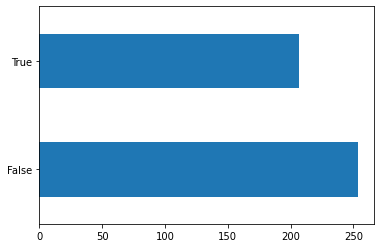

In [3]:
annotations['label'].value_counts().plot.barh()

##### Display examples

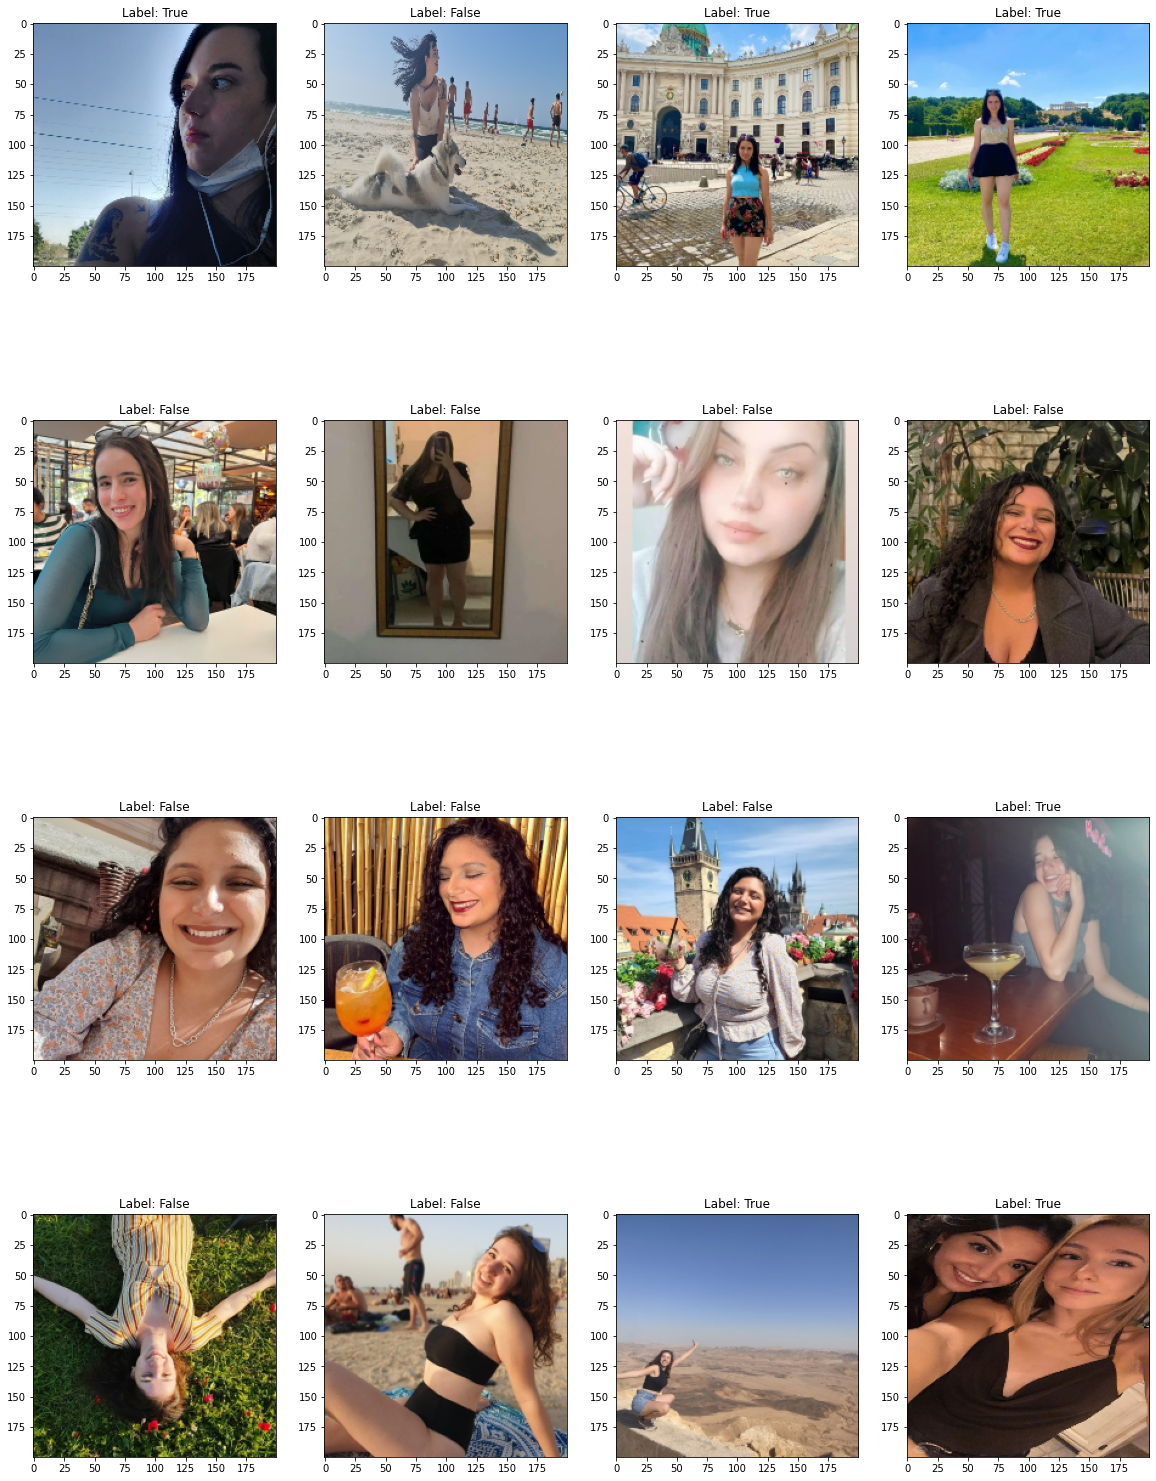

In [14]:
import cv2

n_rows, n_cols = 4, 4
samples = annotations[:n_rows * n_cols]

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 7 * n_rows))

offset = 0
for i in range(n_rows):
    for j in range(n_cols):
        graph = ax[i][j]

        sample = samples.iloc[offset]
        file_name, label = sample['file_name'], sample['label']

        image = np.array(Image.open(os.path.join(images_path, file_name)))
        image = cv2.resize(image, (200, 200))

        graph.imshow(image)
        graph.set_title(f'Label: {label}')

        offset += 1

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras




#### Freeze model

In [10]:
backbone.trainable = False

#### Create new model

#### Train the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=20)


In [15]:
inputs

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_3')>

In [12]:
outputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>